<a href="https://colab.research.google.com/github/krumeto/Data-Science-Study/blob/master/09_softmax_crossentropyloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
print('Outputs: ', softmax(x))

Outputs:  [0.65900114 0.24243297 0.09856589]


In [4]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('Outputs:', outputs)

Outputs: tensor([0.6590, 0.2424, 0.0986])


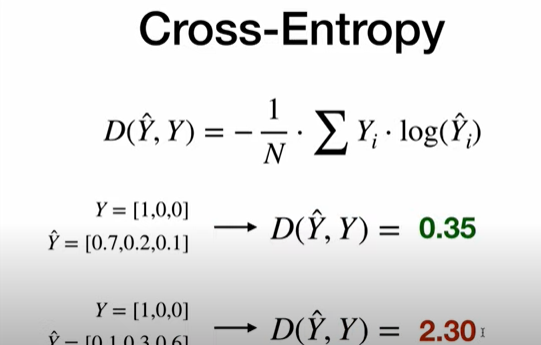

In [6]:
def cross_entropy(actuals, predicted):
  loss = - np.sum(actuals * np.log(predicted))
  return loss

Y = np.array([1,0,0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

print("Loss good numpy", l1)
print("Loss bad numpy", l2)

Loss good numpy 0.35667494393873245
Loss bad numpy 2.3025850929940455


In [8]:
loss = nn.CrossEntropyLoss()
# applies nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# No Softmax in last layer!!
# Y has class labels, not One-Hot!
# Y_pred has raw scores(logits), no Softmax!

Y = torch.tensor([0])
# nsamples * nclasses = 1*3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print("Loss good numpy", l1.item())
print("Loss bad numpy", l2.item())

_, prediction1 = torch.max(Y_pred_good, 1)
_, prediction2 = torch.max(Y_pred_bad, 1)

print(prediction1)
print(prediction2)


Loss good numpy 0.4170299470424652
Loss bad numpy 1.840616226196289
tensor([0])
tensor([1])


In [9]:
loss = nn.CrossEntropyLoss()
# applies nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# No Softmax in last layer!!
# Y has class labels, not One-Hot!
# Y_pred has raw scores(logits), no Softmax!

Y = torch.tensor([2,0,1])
# nsamples * nclasses = 1*3
Y_pred_good = torch.tensor([[2.0, 1.0, 5.1],[2.0, 1.0, 0.1] , [1.0, 2.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.5, 2.0, 0.3], [0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print("Loss good numpy", l1.item())
print("Loss bad numpy", l2.item())

_, prediction1 = torch.max(Y_pred_good, 1)
_, prediction2 = torch.max(Y_pred_bad, 1)

print(prediction1)
print(prediction2)

Loss good numpy 0.2979525625705719
Loss bad numpy 1.4072829484939575
tensor([2, 0, 1])
tensor([1, 1, 1])
